In [58]:
import re
import sys
import unicodedata
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pytagcloud
import webbrowser

In [8]:
text_data = [' fit 메서드는 학습이 완료된 모델을 반환합니다. ?????      ',
             '         fit_transform 메서드는 학습이 완료된 변환기 객체와 변환된 데이터를 반환합니다. !!!!!']

# 공백 문자 제거

In [9]:
strip_whitespace = [string.strip() for string in text_data] 
print(strip_whitespace)

['fit 메서드는 학습이 완료된 모델을 반환합니다. ?????', 'fit_transform 메서드는 학습이 완료된 변환기 객체와 변환된 데이터를 반환합니다. !!!!!']


# 마침표 제거

In [10]:
remove_periods = [string.replace('.','') for string in strip_whitespace]
print(remove_periods)

['fit 메서드는 학습이 완료된 모델을 반환합니다 ?????', 'fit_transform 메서드는 학습이 완료된 변환기 객체와 변환된 데이터를 반환합니다 !!!!!']


# 구두점 제거

In [14]:
punctuation = dict.fromkeys(i for i in range (sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

data = [string.translate(punctuation) for string in remove_periods]
print(data)

['fit 메서드는 학습이 완료된 모델을 반환합니다 ', 'fittransform 메서드는 학습이 완료된 변환기 객체와 변환된 데이터를 반환합니다 ']


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김동명\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 단어 나누기

In [22]:
word_data = word_tokenize(data[0])
print(word_data)

['fit', '메서드는', '학습이', '완료된', '모델을', '반환합니다']


# 문장 나누기

In [25]:
string = ' fit 메서드는 학습이 완료된 모델을 반환합니다. fit_transform 메서드는 학습이 완료된 변환기 객체와 변환된 데이터를 반환합니다.'
sent_data = sent_tokenize(string)
print(sent_data)

[' fit 메서드는 학습이 완료된 모델을 반환합니다.', 'fit_transform 메서드는 학습이 완료된 변환기 객체와 변환된 데이터를 반환합니다.']


# 불용어 제거

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\김동명\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
tokenized_words = ['i', 'am', 'going', 'to', 'the', 'store', 'and', 'park']
stop_words =stopwords.words('english')
filtered_data = [word for word in tokenized_words if word not in stop_words]  #불용어 삭제

print(stop_words)
print(filtered_data)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# 어간 추출

In [44]:
tokenized_words_temp = ['i', 'am', 'going', 'to', 'the', 'store', 'and', 'park', 'meeting', 'traditional', 'humbled']

porter = PorterStemmer()
word_list_temp = []

for word in tokenized_words_temp:
    word_list_temp.append(porter.stem(word))

print(word_list_temp)

['i', 'am', 'go', 'to', 'the', 'store', 'and', 'park', 'meet', 'tradit', 'humbl']


# 품사 태깅

In [46]:
nltk.download('averaged_percetron_tagger')
text_data_tagger = 'Chris loved outdoor running'  #샘플 데이터

text_tagged = pos_tag(word_tokenize(text_data_tagger))
print(text_tagged)

[('Chris', 'NNP'), ('loved', 'VBD'), ('outdoor', 'RP'), ('running', 'VBG')]


[nltk_data] Error loading averaged_percetron_tagger: Package
[nltk_data]     'averaged_percetron_tagger' not found in index


# 단어 중요도에 따른 가중치 부여하기

In [48]:
text_data = np.array((['I loved Brazil. Brazil!', 'Sweden is the best', 'Germany beats both']))

In [50]:
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)
print(feature_matrix)
feature_matrix.toarray()

  (0, 3)	0.8944271909999159
  (0, 6)	0.4472135954999579
  (1, 1)	0.5
  (1, 8)	0.5
  (1, 5)	0.5
  (1, 7)	0.5
  (2, 2)	0.5773502691896257
  (2, 0)	0.5773502691896257
  (2, 4)	0.5773502691896257


array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.5       , 0.5       ],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        ]])

In [52]:
tf = tfidf.vocabulary_  # 특성 이름을 확인
print(tf)

{'loved': 6, 'brazil': 3, 'sweden': 7, 'is': 5, 'the': 8, 'best': 1, 'germany': 4, 'beats': 0, 'both': 2}


# Word Cloud 단어 뭉치 가시화

In [59]:
tag = [('Hello',100), ('World',80), ('Python',120), ('AI',150), ('DB',40), ('Kaggle',55)]

tag_list = pytagcloud.make_tags(tag, maxsize=50) # tag화 시켜줌
pytagcloud.create_tag_image(tag_list, 'word_cloud.jpg', size=(900,600), rectangular=False)

webbrowser.open('word_cloud.jpg')

True

In [60]:
from IPython.display import Image

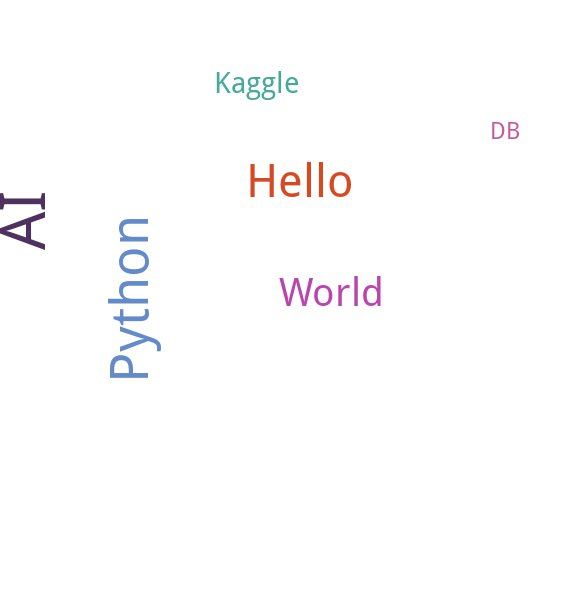

In [61]:
Image('./word_cloud.jpg')